# FINAL. Банки — Анализ оттока клиентов 

### Постановка задачи  
Банка «Метанпром» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. В рамках этой стратегии было инициировано аналитическое исследование. Цель исследования - изучить клиентов и выделить портрет людей,  склонных уходить из банка.  
В ходе исследования необходимо выполнить следующие шаги:  
* сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* cпрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* провести кластеризацию пользователей, с целью выявить неочевидные зависимости;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:     

* предложить меры по снижению оттока и другие особенности взаимодействия с клиентами;
* по итогам исследования подготовить презентацию и интерактивный дашборд.

### План работы  
1. [Выгрузка данных и импорт библиотек](#Выгрузка-данных-и-импорт-библиотек)  
1. [Предобработка данных](#Предобработка-данных)  
    1. Привести данные к нужным типам
    1. Определить и заполнить пропущенные значения 
    2. Обработать дубликаты
    3. Проанилзировать и обработать выбросы
1. [Исследовательский анализ данных (EDA)](#Исследовательский-анализ-данных-(EDA))  
    1. Изучить средние значения и стандартные отклонения всех данных
    1. Изучить матрицу корреляций
    1. Изучить и сравнить средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 
    1. Построить графики по данным
1. [Модель прогнозирования оттока пользователей ](#Модель-прогнозирования-оттока-пользователей)  
    1. Разбить данные на обучающую и валидационную выборку функцией
    1. Обучить несколько моделей бинарной классификации пользователей на обучающей выборке.
    1. Сравнить метрики accuracy, precision и recall для всех моделей на валидационной выборке. На основе сранвнения выбрать лучшую модель.
1. [Кластеризация пользователей](#Кластеризация-пользователей)
    1. Стандартизировать данные.
    1. Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов
    1. Изучить средние значения признаков для кластеров
    1. Построить графики по данным
1. [Вывод](#Вывод)  
    1. Сформулировать основные выводы и предложить рекомендации для стратегии взаимодействия с пользователями и их удержания.
    1. Сделать прзентацию
    1. Сделать дашборд

### Материалы
* [Презентация](https://drive.google.com/file/d/1snVd1aNvmoxglNn5ORh_66jV3RmjnSRO/view?usp=sharing) 
* [Дашборд](https://public.tableau.com/views/Book1_16020096273820/sheet1?:language=en&:display_count=y&publish=yes&:origin=viz_share_link)

#  Выгрузка данных и импорт библиотек

In [1]:
# Импортируем необходимые библиотеки и модули
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Импортируем необходимые библиотеки и модули для машинного обучения
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Считаем данные из датасета bank_dataset, проверим корректность выгрузки
bank_data = pd.read_csv('/datasets/bank_dataset.csv')
bank_data

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Проверим общую информацию о данных
bank_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
City                10000 non-null object
Gender              10000 non-null object
Age                 10000 non-null int64
Objects             10000 non-null int64
Balance             6383 non-null float64
Products            10000 non-null int64
CreditCard          10000 non-null int64
Loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
Churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


В таблице marketing_events 10000 строк и 4 столбца. В них содержится следующая информация:  
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

В столбце Balance есть пропуски. Столбец userid целесообразно привести к строковому типу, а gender привести к бинароному типу.

## Предобработка данных

In [5]:
# Преименуем столбцы
bank_data.columns = ['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance', 
                     'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn']

In [6]:
# Проверим таблицу на наличие дуликатов
bank_data.duplicated().sum()

0

In [7]:
# Выведем строки с пропусками
bank_data.query('balance.isna()')

,userid,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


Беглый взгляд не дает выявить закономерностей появления пропусков. Единсвтенное что стоит проверить - это города, так как в срезе встречаются только два.

In [8]:
# Узнаем сколько городов в датасете
bank_data['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

In [9]:
# Узнаем сколько городов в срезе
bank_data.query('balance.isna()')['city'].value_counts()

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64

Гипотеза оказалась верной. Пропуски есть только в двух городах из трех. Пропуски целесообразно заполнить медианными занчениями.

In [10]:
# Поситчаем медианы
rib_med = bank_data.groupby('city').median().loc['Рыбинск', 'balance']
yar_med = bank_data.groupby('city').median().loc['Ярославль', 'balance']

In [11]:
# pd.options.mode.chained_assignment = "warn"

In [12]:
# Заполним пропуски
bank_data.loc[bank_data.query('balance.isna() and city == "Ярославль"' ).index] = (bank_data
                                                                                   .query('balance.isna() and city == "Ярославль"')
                                                                                   .fillna(value=yar_med))

bank_data.loc[bank_data.query('balance.isna() and city == "Рыбинск"' ).index] = (bank_data
                                                                                   .query('balance.isna() and city == "Рыбинск"')
                                                                                   .fillna(value=rib_med))

In [13]:
# Проверим еще раз количество пропусков
len(bank_data.query('balance.isna()' ))

0

In [14]:
# Приведем userid к строковому типу
bank_data['userid'] = bank_data['userid'].apply(str)

In [15]:
# Приведем столбец gender к булевуму типу
bank_data['gender'].replace('М','1',inplace=True)
bank_data['gender'].replace('Ж','0',inplace=True)
bank_data['gender'] = pd.to_numeric(bank_data['gender'], errors='coerce').astype('Int64')

## Исследовательский анализ данных (EDA)

In [16]:
# Изучим сводные данные
bank_data.describe()

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,119889.771122,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.497932,10.487806,2.892174,24043.787397,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,111581.127500,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,120135.155000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Видим, что нет аномлаий или выбросов: в бинарных колонках соблюдается минимумы (0) и максимумы (1), в столбце с возрастом есть только совершеннолетние (18+).

In [17]:
# Посмотрим на средние значения признаков по городам
bank_data.groupby('city').mean()

,userid,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
city,,,,,,,,,,,
Ростов Великий,inf,651.453567,0.524512,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Рыбинск,inf,651.333872,0.560355,38.890997,5.032297,119772.129818,1.539362,0.694792,0.529673,99440.572281,0.166734
Ярославль,inf,649.668329,0.549063,38.511767,5.004587,120027.779075,1.530913,0.706621,0.516753,99899.180814,0.161548


Все показатели примрено равны. Но при этом в Ростове в вда раза выше отток клиентов

In [18]:
# Посмотрим на средние значения признаков в двух группа
bank_data.groupby('churn').mean()

,age,balance,credit_card,estimated_salary,gender,loyalty,objects,products,score,userid
churn,,,,,,,,,,
0,37.408389,119717.274646,0.707146,99738.391772,0.572523,0.554565,5.033279,1.544267,651.853196,inf
1,44.837997,120564.090925,0.699067,101465.677531,0.440844,0.360825,4.932744,1.475209,645.351497,inf


Разберем подробно каждый признак:  
- `Age` — средний возраст неушедших на 7 лет меньше.
- `Balance` — баланс на счёте в обоих классах примерно равен 120 тысячам.
- `CreditCard` — процент обладателей кредитных карт примерно равен 70%.
- `estimated_salary` — заработная плата ушедших клиентов выше на 2 тысячи
- `Gender` — среди неушедших на 13% больше мужчин.
- `Loyalty` — среди неушедших на 19% больше активных клиентов.
- `Objects` — количество объектов в собственности в обоих классах равное
- `Products` — количество продуктов, которыми пользуется клиенты примерно равно, но у неушедших метрика чуть выше.
- `score` — баллы кредитного скоринга в среднем выше на 6 пунктов у неушедших.  

Пока турдно сделать какие-либо выводы, кроме того, что оставшиеся клиенты в среднем моложе, среди них больше мужчин, и они боле лояльные и активные клиенты.

In [19]:
# Перед построением графиков установим стиль и палитру
sns.set_style("whitegrid")
sns.set_palette('deep')

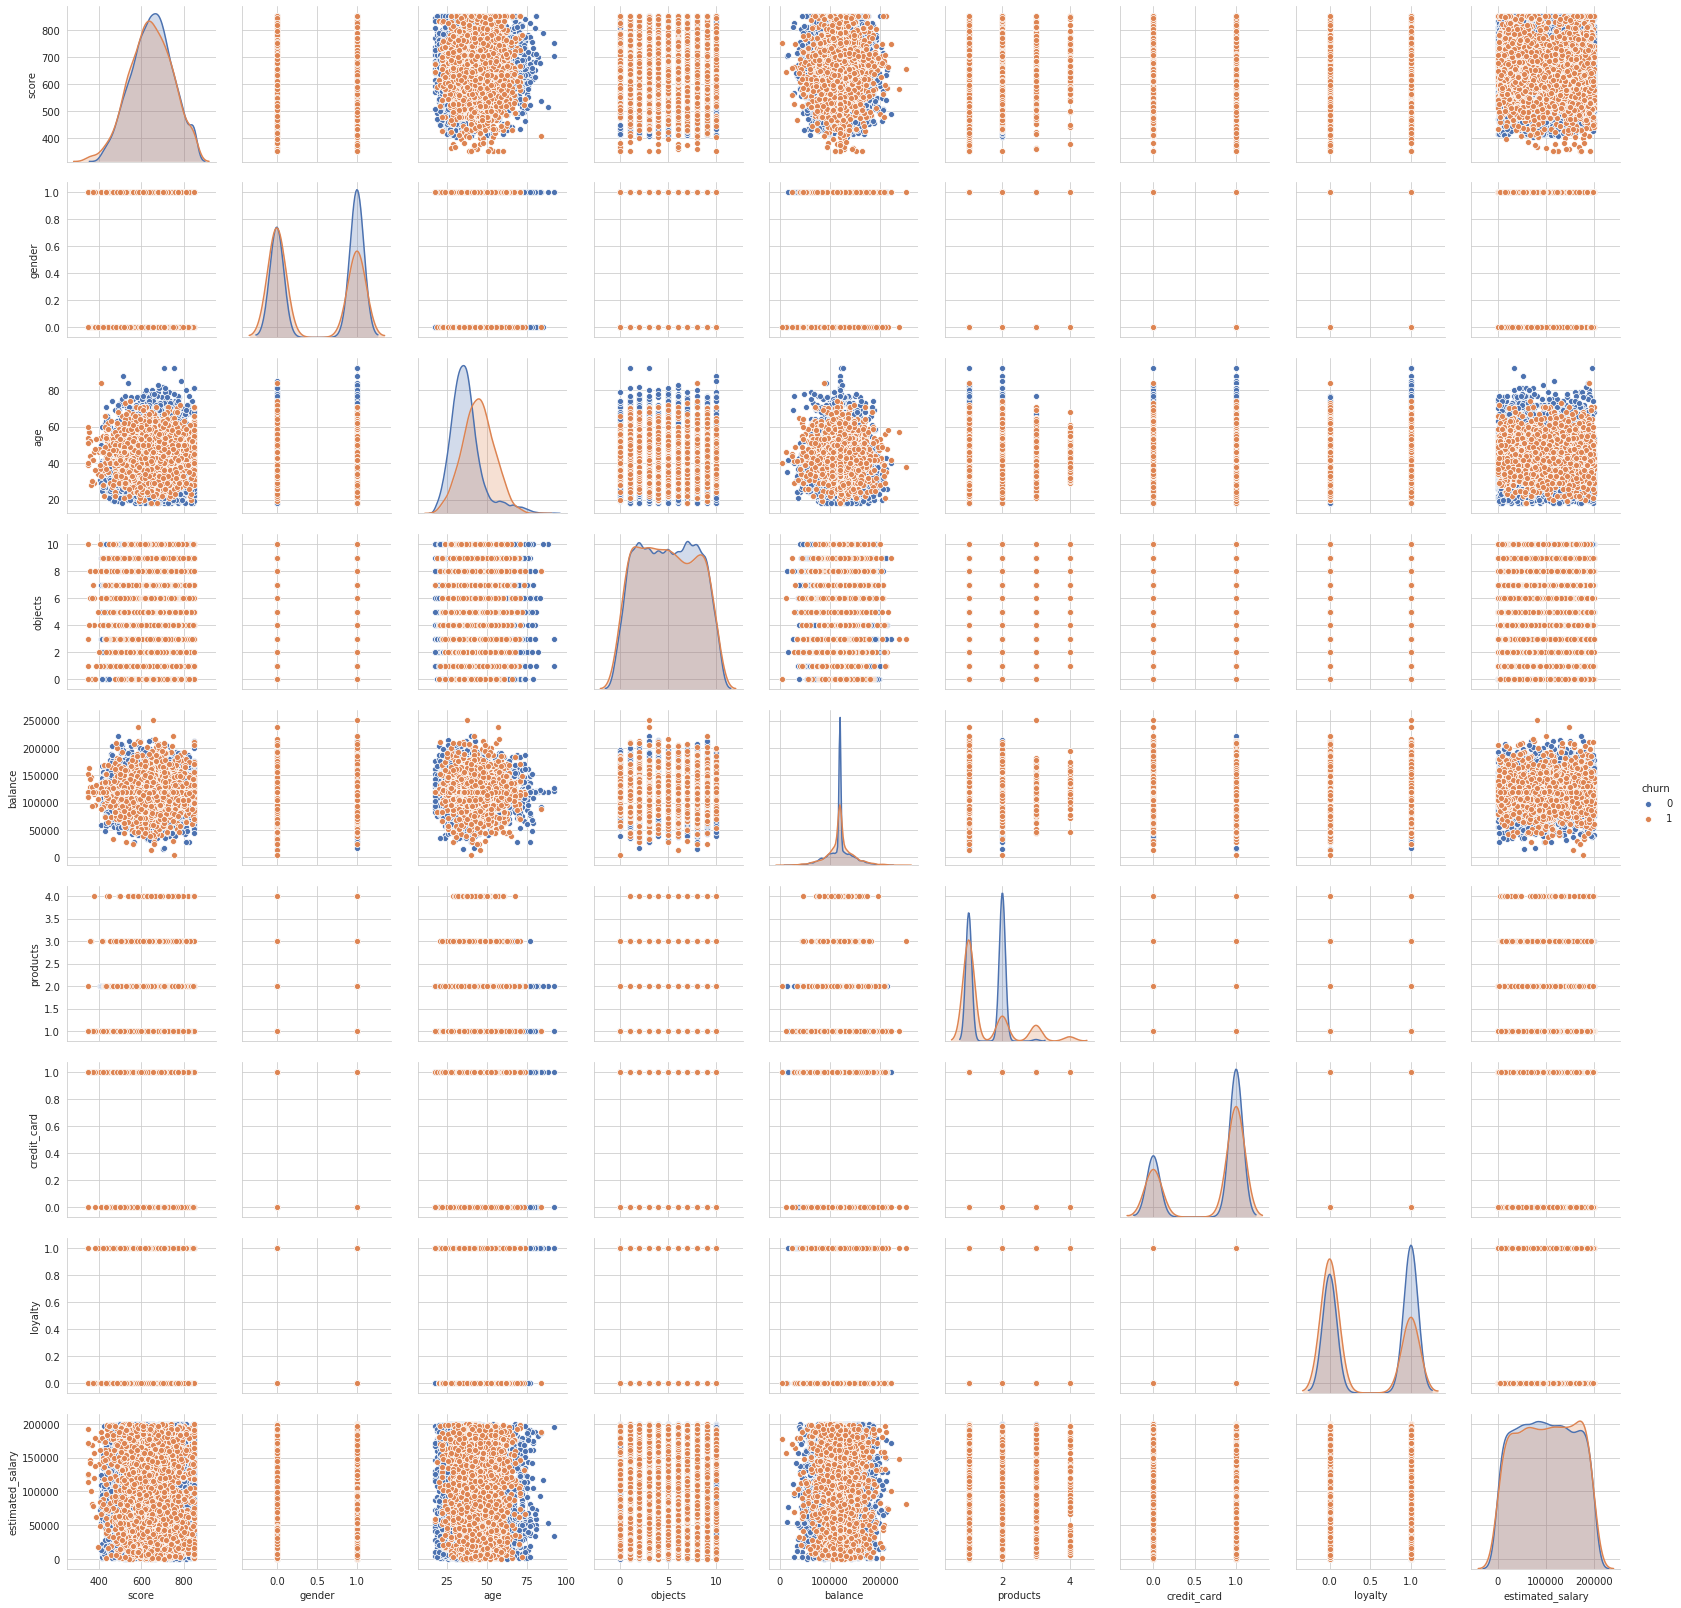

In [20]:
# Построим графики
sns.pairplot(data=bank_data, x_vars = ['score', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary'], y_vars=['score', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary'], hue='churn' );

Видим что класс ушедших значительно меньше по количеству людей. Все признаки ушедших лежат в меньшем диапазоне, чем у неушедших.  На всех точечных диаграммах облака кучкуются равномерно и без выбросов. Положение средних и высота гаусиан на иагонали повторяет выводы, сделанные выше по усредненнным значениям.

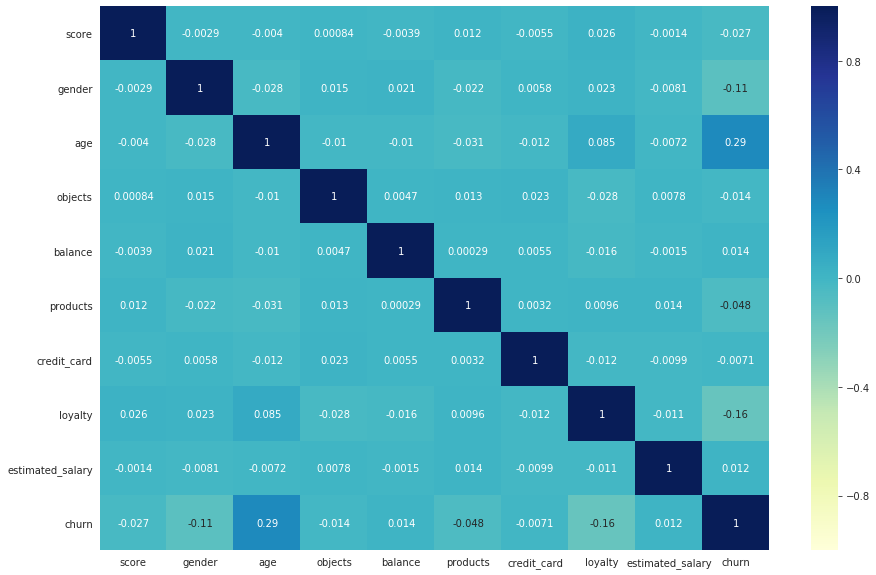

In [21]:
# Построим матрицу корреляций 
plt.figure(figsize=(15, 10))
sns.heatmap(bank_data.corr(), annot=True, cmap="YlGnBu",vmin=-1, vmax=1, center= 0 );

Более менее заметная корреляция есть только между возрастом и фактом ухода, что потверждает выводы сделанные выше.

## Модель прогнозирования оттока пользователей

Построим модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце.

In [22]:
# Узнаем размеры классов
bank_data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

Классы соотносятся 80 / 20. Из-за такого дизбаланса метрики accuracy, precision и recall будут плохими. Поэтому целесообразно использовать roc_auc.

Обработаем категориальные переменные с помощью енкодера. При обучении мы не будем исопльзовать столбец userid, так как он не несет в себе никакой информации.

In [23]:
# Обработаем категориальные переменные 
bank_data_dum = pd.get_dummies(bank_data.drop('userid', axis = 1))
bank_data_dum.head()

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,619,0,42,2,120135.155,1,1,1,101348.88,1,0,0,1
1,608,0,41,1,83807.860,1,0,1,112542.58,0,0,1,0
2,502,0,42,8,159660.800,3,1,0,113931.57,1,0,0,1
3,699,0,39,1,120135.155,2,0,0,93826.63,0,0,0,1
4,850,0,43,2,125510.820,1,1,1,79084.10,0,0,1,0


In [24]:
# Выделим признаки и целевую переменную, разобъем данные на обучающую и валидационную выборку
X = bank_data_dum.drop('churn', axis = 1)
y = bank_data_dum['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# Создадим вспомогательную функцию для обучения
def make_prediction(model, X_train, y_train, X_test, y_test):
    metrics = []
    metric_list = ['accuracy', 'precision', 'recall', 'f1', 'auc_roc']
    m = model
    m.fit(X_train, y_train) # обучим модель
    y_pred = m.predict(X_test) # сделаем прогноз обученной моделью
    y_prob = m.predict_proba(X_test)[:,1]
    
    # Посчитаем мтерики
    metrics = [accuracy_score(y_test, y_pred),
               precision_score(y_test, y_pred),
               recall_score(y_test, y_pred),
               f1_score(y_test, y_pred),
               roc_auc_score(y_test, y_prob)]
    return pd.Series(metrics, index=metric_list)

In [26]:
def make_all_predictions(X_train, y_train, X_test, y_test):    
    # Создадим вспомогательные списки
    reg_models_list = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]
    models_name = ['LogisticRegression', 'RandomForestClassifier']
    metric_list = ['accuracy', 'precision', 'recall', 'f1', 'auc_roc']
    
    # Инициируем итоговый датафрейм
    regression  = pd.DataFrame(columns=metric_list) 
    
    # В цикле обучим модели
    for model in reg_models_list:
        regression = regression.append(make_prediction(model, X_train, y_train, X_test,  y_test), ignore_index=True )
    regression.index = models_name
    return regression.round(2)

In [27]:
make_all_predictions( X_train, y_train, X_test,  y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,accuracy,precision,recall,f1,auc_roc
LogisticRegression,0.79,0.08,0.00,0.00,0.66
RandomForestClassifier,0.86,0.74,0.48,0.58,0.83


Ожидаемо видим плохие показатели precision,	recall,	f1 и относительно неплохой auc_roc для логистической регрессии. Для случайного леса получаем отличные accuracy и auc_roc, хороший precision, и плохие recall и f1.  
Попробуем сделать те же действия, но для стандартизированных данных

In [28]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [29]:
make_all_predictions( X_train_st, y_train, X_test_st,  y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,accuracy,precision,recall,f1,auc_roc
LogisticRegression,0.82,0.62,0.23,0.34,0.77
RandomForestClassifier,0.86,0.73,0.48,0.58,0.83


Для случайного леса показатели не изменились, за сиключением снижения precision на 1%. И при этом видим значительный прирост всех метрик для регрессии.  
По итогу случайный лес показал результат лучше.

## Кластеризация пользователей

Провдем кластеризацию клиентов.

In [30]:
scaler = StandardScaler() # создадим объект класса StandardScaler и применим его к обучающей выборке
x_sc = scaler.fit_transform(X) # обучим scaler и одновременно трансформируем матрицу для обучающей выборки

In [ ]:
# Построми матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

Получаем три класса.

In [31]:
# Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов
km = KMeans(n_clusters = 5, random_state = 0 )
labels = km.fit_predict(x_sc)
bank_data_dum['labels'] = labels
bank_data_dum['labels'].value_counts()

0    2509
4    2477
1    2261
3    1429
2    1324
Name: labels, dtype: int64

In [32]:
# Посмотрим на средние значения признаков для кластеров. 
kluster_mean = bank_data_dum.groupby(['labels']).mean()
kluster_mean

,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль
labels,,,,,,,,,,,,,
0,651.453567,0.524512,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432,1,0,0
1,649.185759,0.000000,38.773994,4.950022,119247.874447,1.547545,0.697921,0.513932,99564.252755,0.203450,0,0,1
2,647.645015,1.000000,37.003021,5.131420,122008.358063,1.493202,0.716767,0.000000,100827.087054,0.169184,0,0,1
3,652.306508,1.000000,39.494752,4.973408,119426.713842,1.539538,0.710987,1.000000,99569.386886,0.088174,0,0,1
4,651.333872,0.560355,38.890997,5.032297,119772.129818,1.539362,0.694792,0.529673,99440.572281,0.166734,0,1,0


Разберем подробно каждый признак:  
- `score` — самые низкие баллы кредитного скоринга у класса 2, самый высокий - у 3.
- `Gender` —  2 и 3 классы состят только из мужчин, 1- только из женщин, а 0 и 4- примерно поровну.
- `Age` — средний возраст во всех классах примерно одинаковый.
- `Objects` — количество объектов в собственности во всех классах примерно равное
- `Balance` — баланс на счёте во всех классах примерно равен 120 тысячам.
- `Products` — количество продуктов, которыми пользуется клиенты примерно равно во всех классах.
- `CreditCard` — во всех классах процент обладателей кредитных карт примерно равен 70%.
- `Loyalty` —  во 2 классе нет активных клиентов, в 3 - все клиенты лояльны. В сотальных классах людей поровну.
- `estimated_salary` — во всех классах заработная плата колеблется около 100 тысяч.
- `city` - 0 класс целиком живет в Ростове, 4 класс - в Рыбинске, остальные - в Ярославле.

- `churn` —  наименьший процент ушедших в 3 классе, самый высокий - в 0 классе.

### Коментарий наставника

<font color = purple>Верно
</font>

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


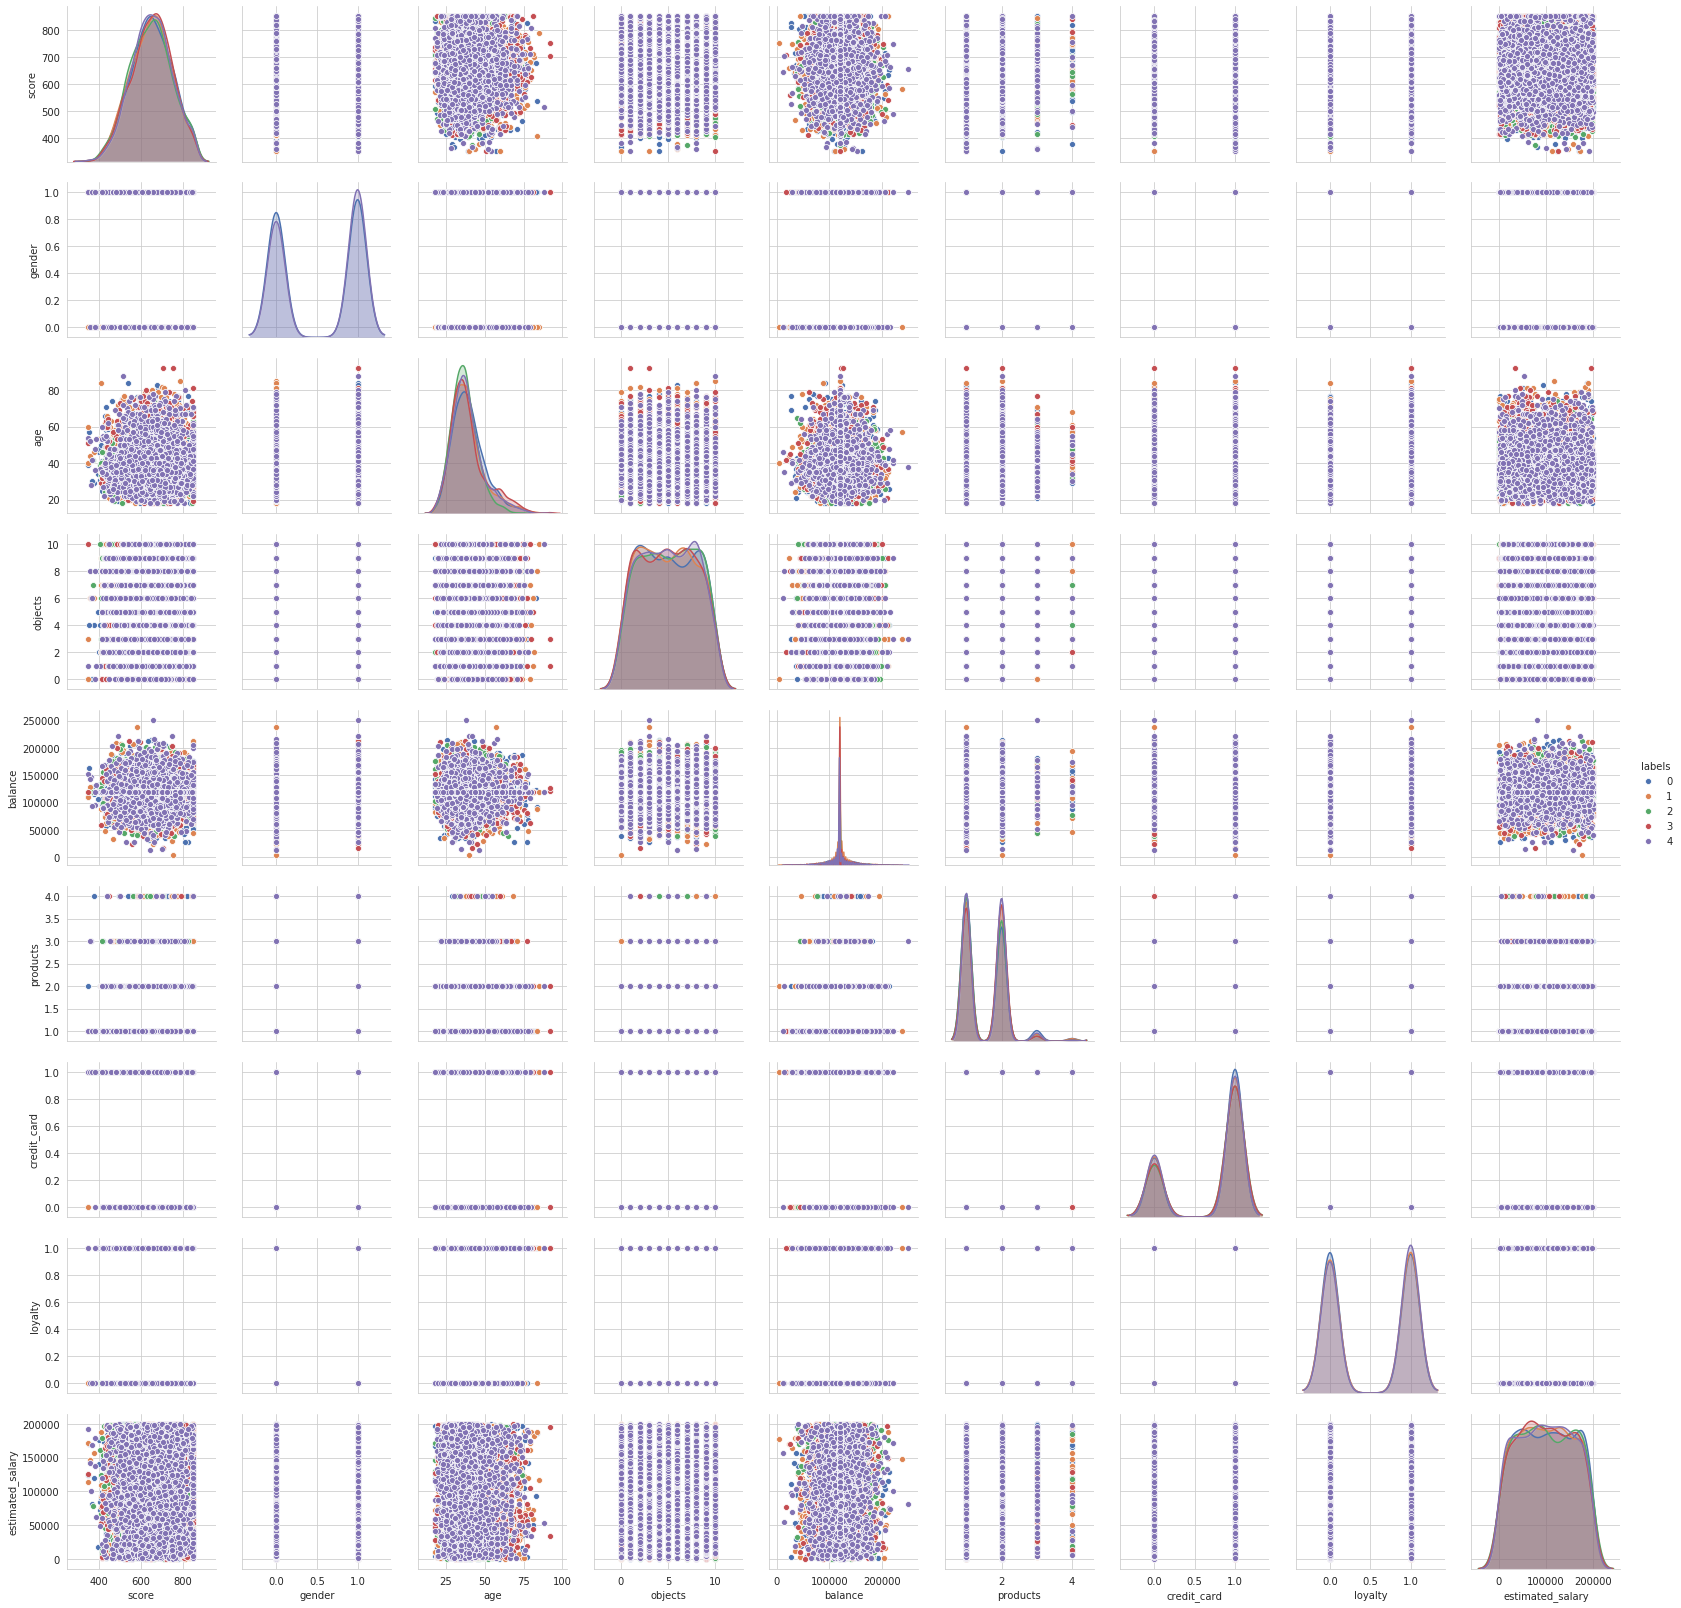

In [33]:
sns.pairplot(data=bank_data_dum, x_vars = ['score', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary'], y_vars=['score', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary'], hue='labels' );

Распределения ложатся кучно, выводы по такой картинке делать сложно. Положение средних и высота гаусиан на иагонали повторяет выводы, сделанные выше по усредненнным значениям.

## Вывод

Анализ оттока клиентов показал, что постоянные клиенты в среднем моложе, среди них больше мужчин, и они боле лояльные и активные клиенты, также они живут НЕ в Ростове.

Кластерный анализ показал, что целесообразнее всего сосоредоточиться на 2,3 и 4 классах - так как у них наименьшая доля отттока.